<a href="https://colab.research.google.com/github/EmiHamada/Sunb_Box/blob/master/Pytourch/PyTourch_tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Deep Learning with PyTorch: A 60 Minute Blitz_AUTOGRAD: TRAINING A CLASSIFIER   
 [PyTourch公式](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#)

In [0]:
import torch

## 画像分類チュートリアル_CIFAR-10

###torchvisionを使用してCIFAR10トレーニングおよびテストデータセットを読み込み、正規化する

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transforms = transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train=True, transform = transforms, download = True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train=False, transform = transforms, download = True)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
! pip install --upgrade torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)


<class 'torch.Tensor'>


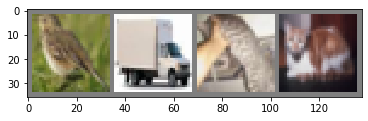

 bird truck   cat   cat


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# print(' '.join('%5s' % classes[labels[j]] for j in range(3)))

###畳み込みニューラルネットワークを定義する


In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120) 
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = Net()

###損失関数を定義する


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###トレーニングデータでネットワークをトレーニングする


In [23]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.934
[1,  4000] loss: 1.919
[1,  6000] loss: 1.902
[1,  8000] loss: 1.875
[1, 10000] loss: 1.869
[1, 12000] loss: 1.871
[2,  2000] loss: 1.848
[2,  4000] loss: 1.825
[2,  6000] loss: 1.814
[2,  8000] loss: 1.803
[2, 10000] loss: 1.815
[2, 12000] loss: 1.809
Finished Training


In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

###テストデータでネットワークをテストする

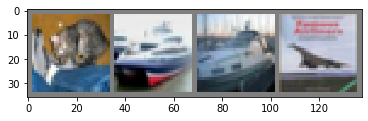

GroundTruth:    cat  ship  ship plane


In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [26]:
_, pridected = torch.max(outputs, 1)
print('Pridected: ', ' '.join('%5s' % classes[pridected[j]] for j in range(4)))

Pridected:   frog  ship  ship truck


In [29]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 31 %


In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 25 %
Accuracy of   car : 26 %
Accuracy of  bird : 12 %
Accuracy of   cat : 22 %
Accuracy of  deer : 13 %
Accuracy of   dog : 33 %
Accuracy of  frog : 51 %
Accuracy of horse : 44 %
Accuracy of  ship : 40 %
Accuracy of truck : 47 %
